In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from IPython.display import display, HTML
import datetime

path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
df = pd.DataFrame()
for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[15:]:
            short_name = csv_file[15:]
            #print(short_name)
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            year = short_name[0:4]
            month = short_name[5:7]
            day =short_name[8:10]
            date = year + '-' + month + '-' + day
            #print(date)
            
            df_temp['date'] = date
            df_temp.date = pd.to_datetime(df_temp.date)
            df_temp.set_index(df_temp.date, inplace=True)
            df_temp.drop(columns=['date'], inplace=True)
            
            df = pd.concat([df, df_temp])
#print(list_data)

sns.set_style("whitegrid")


In [2]:
df.sort_index(inplace = True)
df['year'] = df.index.year

In [3]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,index,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year
count,37400.000000,37400.000000,37400.000000,37400.000000,3.740000e+04,37400.000000,37400.000000,37400.00000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000,37400.000000
mean,99.500000,99.500000,100.500000,100.500000,4.602958e+05,0.688842,0.677593,5.24139,-6.025736,0.549893,0.125659,0.201420,0.003916,0.165624,0.497279,119.560290,3.979091,200521.146070,2018.331551
std,57.735077,57.735077,57.735077,57.735077,4.459066e+05,0.121516,0.136627,3.69074,1.926925,0.497511,0.105679,0.197855,0.043100,0.126501,0.208633,27.401078,0.211797,34946.322285,1.053259
min,0.000000,0.000000,1.000000,1.000000,5.154300e+04,0.168000,0.027900,0.00000,-34.475000,0.000000,0.023200,0.000176,0.000000,0.019600,0.034300,53.808000,1.000000,35240.000000,2017.000000
25%,49.750000,49.750000,50.750000,50.750000,2.242008e+05,0.617000,0.587000,1.00000,-7.049000,0.000000,0.048700,0.052200,0.000000,0.093100,0.339000,98.098000,4.000000,178120.000000,2017.000000
50%,99.500000,99.500000,100.500000,100.500000,3.365395e+05,0.703000,0.689000,6.00000,-5.773000,1.000000,0.080200,0.137000,0.000000,0.118000,0.497000,119.939000,4.000000,200976.000000,2018.000000
75%,149.250000,149.250000,150.250000,150.250000,5.272985e+05,0.774000,0.778000,8.00000,-4.792000,1.000000,0.178000,0.283000,0.000003,0.188000,0.657000,135.952000,4.000000,220293.000000,2019.000000
max,199.000000,199.000000,200.000000,200.000000,8.223614e+06,0.971000,0.982000,11.00000,-0.928000,1.000000,0.966000,0.994000,0.918000,0.921000,0.968000,212.117000,5.000000,526387.000000,2020.000000


In [4]:
top50 = df[df['Position']>=50]
top50 = top50.resample('W').mean()

In [5]:
idx = pd.MultiIndex.from_arrays([
        pd.to_datetime(top50.index.strftime('2020-%m-%d %H:%M:%S')),
        top50.index.year
    ])

d1 = top50.set_index(idx).unstack().resample('W').mean()

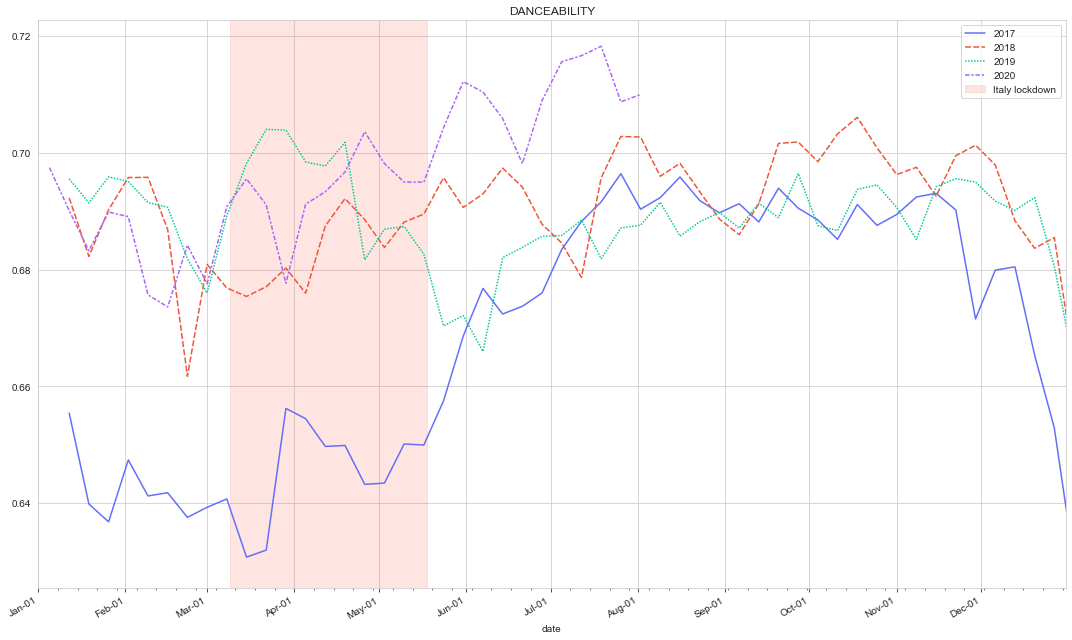

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.danceability, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='DANCEABILITY')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

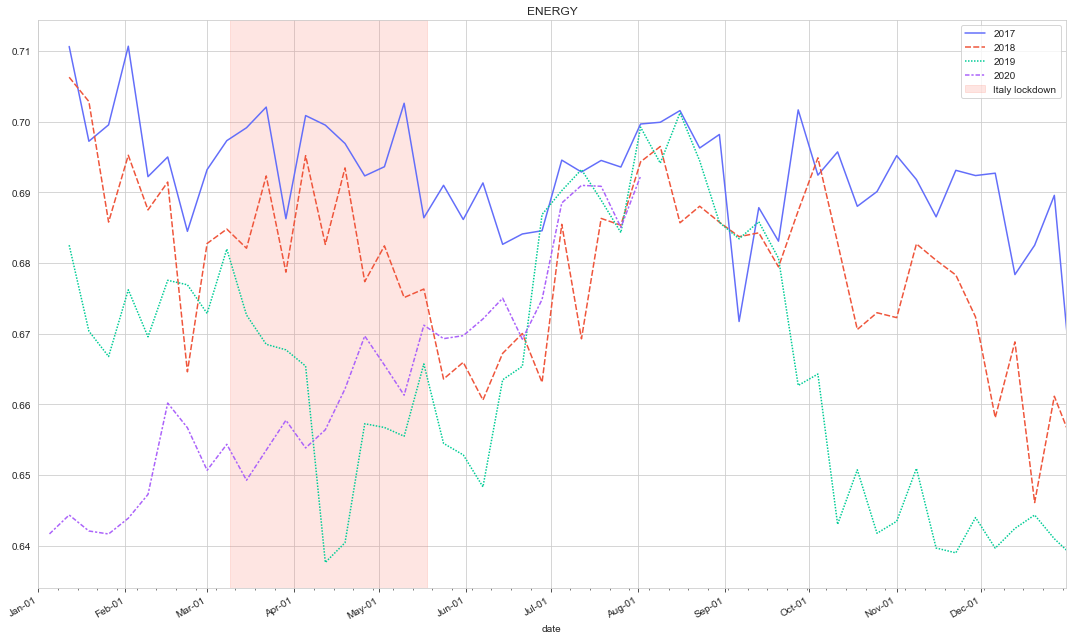

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.energy, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='ENERGY')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

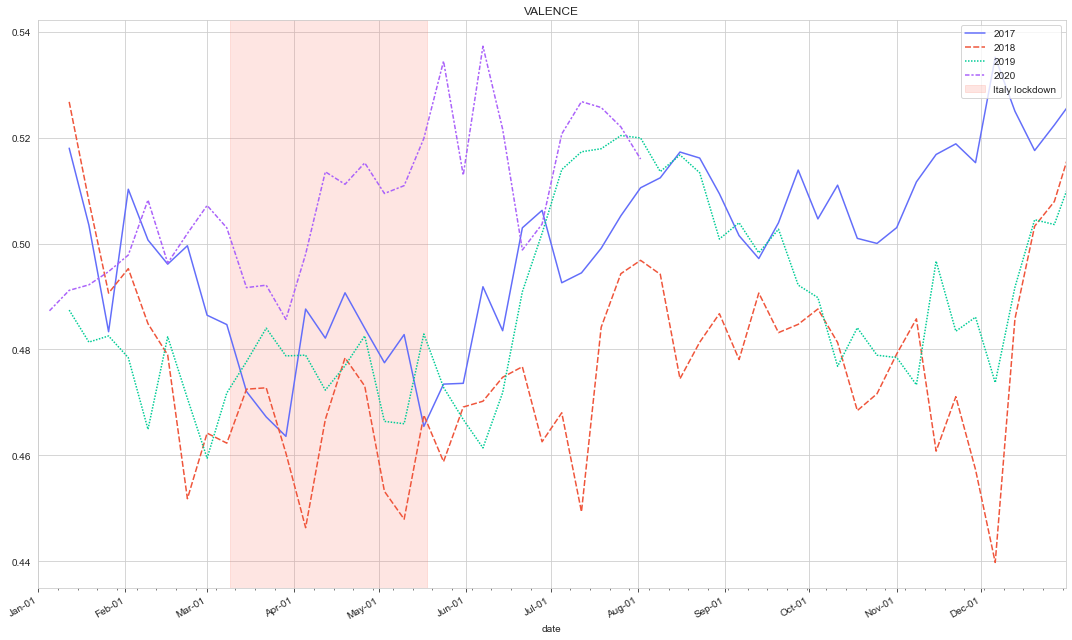

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.valence, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='VALENCE')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

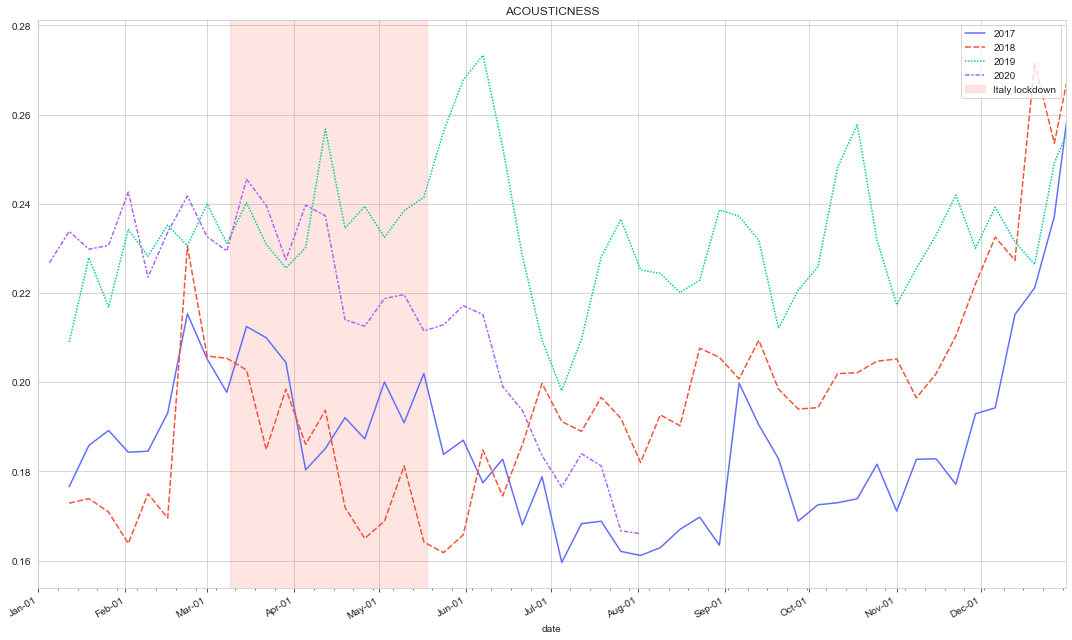

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.acousticness, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='ACOUSTICNESS')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

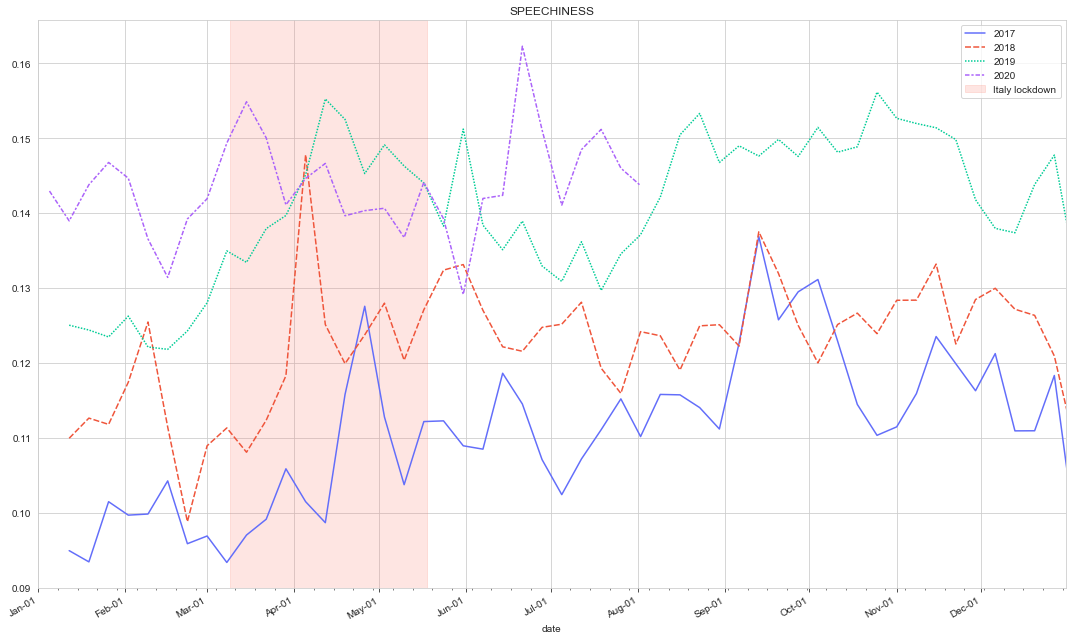

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.speechiness, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='SPEECHINESS')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

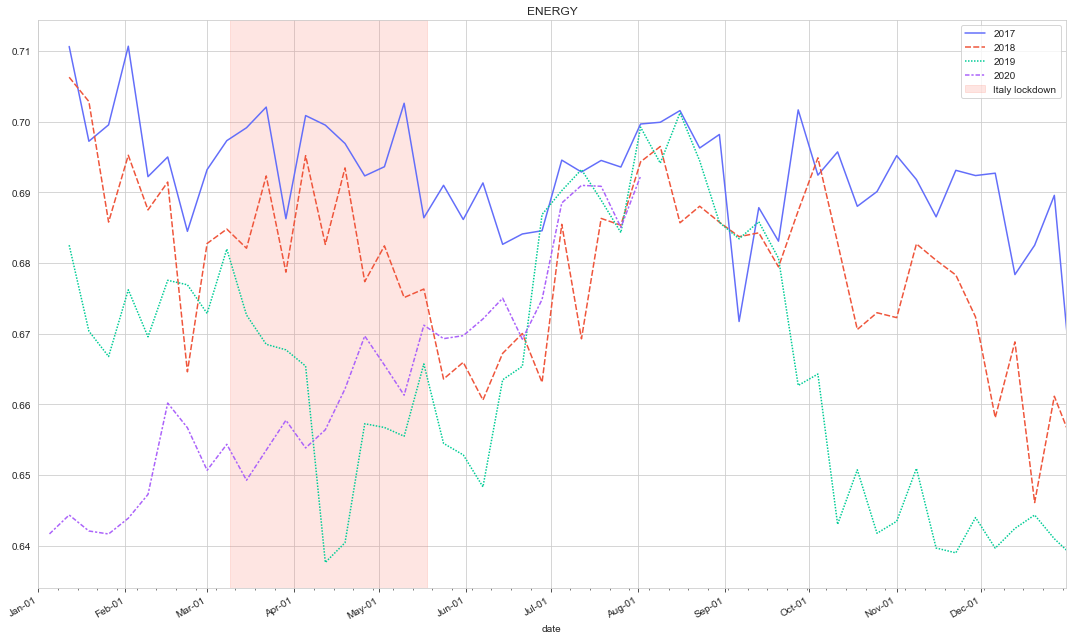

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.energy, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='ENERGY')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

In [17]:
import plotly.graph_objects as go

df_resampled = df[df['Position']<=50].resample('M').mean()
df_relevant = df_resampled[['danceability','energy','acousticness','valence','speechiness']]

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Scatterpolar(r=df_relevant.iloc[0],
                         theta=df_relevant.columns,
                         visible=True,
                             name = str(df_relevant.index[0].year) + '-' +  str(df_relevant.index[0].month))
             )

# Add surface trace
fig.add_trace(go.Scatterpolar(r=df_relevant.iloc[0],
                         theta=df_relevant.columns,
                         visible=True,
                             name = str(df_relevant.index[0].year) + '-' +  str(df_relevant.index[0].month))
             )

buttons1 = []
buttons2 = []

# button with one option for each dataframe
for date in df_relevant.index:
    year_month = str(date.year) +'-'+str(date.month)
    #print(df_relevant[year_month].to_numpy())
    buttons1.append({
                    'method': 'restyle',
                    'label': year_month,
                    'args': [
                        {'r': df_relevant[year_month].to_numpy(),
                         'type' : 'scatterpolar',
                        'name' : year_month}, [0]
                    ]
    }
    )

for date in df_relevant.index:
    year_month = str(date.year) +'-'+str(date.month)
    #print(df_relevant[year_month].to_numpy())
    buttons2.append({
                    'method': 'restyle',
                    'label': year_month,
                    'args': [
                        {'r': df_relevant[year_month].to_numpy(),
                         'type' : 'scatterpolar',
                        'name' : year_month}, [1]
                    ]
    }
    )

# some adjustments to the updatemenus
updatemenu = []
first_menu = dict()
second_menu = dict()
updatemenu.append(first_menu)
updatemenu.append(second_menu)

updatemenu[0]['buttons'] = buttons1
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True
#updatemenu[0]['pad'] = {"r": 10, "t": 10}
updatemenu[0]['x'] = 0.1
updatemenu[0]['xanchor'] = 'left'
updatemenu[0]['y'] = 1.1
updatemenu[1]['yanchor'] = 'top'
updatemenu[1]['buttons'] = buttons2
updatemenu[1]['direction'] = 'down'
updatemenu[1]['showactive'] = True
updatemenu[1]['x'] = 0.1
updatemenu[1]['xanchor'] = 'left'

#updatemenu[1]['pad'] = {"r": 10, "t": 10}

# add dropdown menus to the figure
fig.update_layout(updatemenus=updatemenu)
fig.update_layout(
    annotations=[
        dict(text="Date 1:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left",
            font = dict(
                color='blue'
            )),
        dict(text="Date 2:", showarrow=False,
        x=0, y=0.98, yref="paper", align="left", 
             font = dict(
                color='red'
            ))
    ]
)

fig.update_layout(
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0.1, 0.75]
    )),
  showlegend=True
)

fig.update_traces(fill='toself')
fig.show()